**A three layer neural network**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

X = np.array([ [0,0], [0,1], [1,0], [1,1] ])
Y = np.array([ [0], [1], [1], [0] ])

In [12]:
class NeuralNetwork(object):
    def __init__(self):
        inputLayerNeurons = 2
        hiddenLayerNeurons1 = 10  # First hidden layer
        hiddenLayerNeurons2 = 10  # Second hidden layer
        outLayerNeurons = 1

        self.learning_rate = 0.2
        self.W_H1I = np.random.randn(inputLayerNeurons, hiddenLayerNeurons1)
        self.W_H2H1 = np.random.randn(hiddenLayerNeurons1, hiddenLayerNeurons2)
        self.W_OH2 = np.random.randn(hiddenLayerNeurons2, outLayerNeurons)

    def sigmoid(self, x, der=False):
        if der == True:
            return x * (1 - x)
        else:
            return 1 / (1 + np.exp(-x))

    def feedForward(self, X):
        hidden1_input = np.dot(X, self.W_H1I)
        self.hidden1_output = self.sigmoid(hidden1_input)

        hidden2_input = np.dot(self.hidden1_output, self.W_H2H1)
        self.hidden2_output = self.sigmoid(hidden2_input)

        output_input = np.dot(self.hidden2_output, self.W_OH2)
        pred = self.sigmoid(output_input)
        return pred

    def backPropagation(self, X, Y, pred):
        output_error = Y - pred
        output_delta = self.learning_rate * output_error * self.sigmoid(pred, der=True)

        hidden2_error = output_delta.dot(self.W_OH2.T)
        hidden2_delta = self.learning_rate * hidden2_error * self.sigmoid(self.hidden2_output, der=True)

        hidden1_error = hidden2_delta.dot(self.W_H2H1.T)
        hidden1_delta = self.learning_rate * hidden1_error * self.sigmoid(self.hidden1_output, der=True)

        self.W_H1I += X.T.dot(hidden1_delta)
        self.W_H2H1 += self.hidden1_output.T.dot(hidden2_delta)
        self.W_OH2 += self.hidden2_output.T.dot(output_delta)

    def train(self, X, Y):
        output = self.feedForward(X)
        self.backPropagation(X, Y, output)


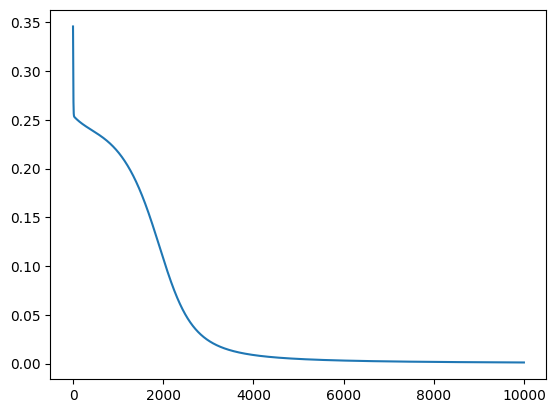

In [22]:
NN = NeuralNetwork()

err = []
for i in range(10000):
    NN.train(X, Y)
    err.append(np.mean(np.square(Y - NN.feedForward(X))))

plt.plot(err)
plt.show()

In [17]:
print(NN.feedForward([0,0]))

[0.03870739]


In [23]:
print(NN.feedForward([1,1]))

[0.03618865]


In [24]:
print(NN.feedForward([1,0]))

[0.96606665]


In [25]:
print(NN.feedForward([0,1]))

[0.96377277]
